In [207]:
import osmnx as ox
import matplotlib.colors as colors
import networkx as nx
from IPython.display import Image
from pprint import pprint
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, LineString
import plotly_express as px

In [31]:
ox.config(log_console=True, use_cache=True)
ox.__version__

'1.0.1'

In [45]:
place_name = "Kamppi, Helsinki, Finland"
graph = ox.graph_from_place(place_name, network_type='drive')

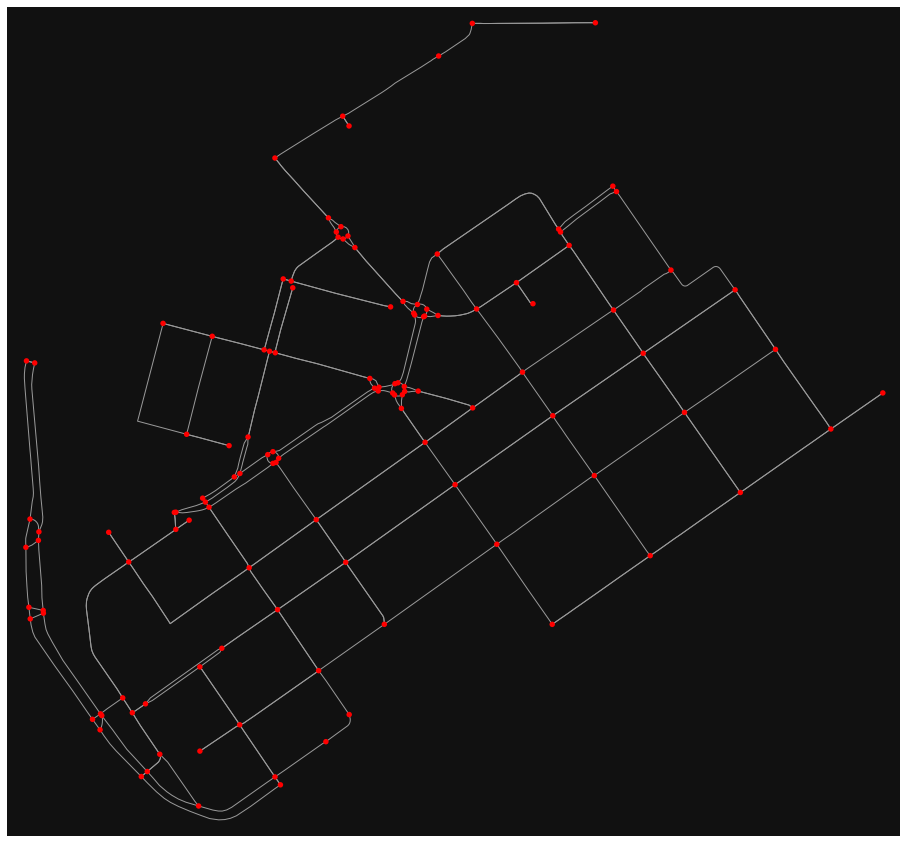

In [82]:
fig, ax = ox.plot_graph(graph, node_size=30, node_color='r', figsize=(16, 16))
nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)

In [85]:
edges.head()

osmid  \
u        v          key                                                      
25216594 1372425714 0                                             23856784   
25238874 1372425713 0                                 [29977177, 30470347]   
25238944 25216594   0                                 [372440330, 8135861]   
         319896278  0            [25514547, 677423564, 30288797, 30288799]   
25291537 25291591   0    [30568275, 36729015, 316590744, 316590745, 316...   

                         oneway   lanes            name   highway maxspeed  \
u        v          key                                                      
25216594 1372425714 0      True       2  Mechelininkatu   primary       40   
25238874 1372425713 0      True       3  Mechelininkatu   primary       40   
25238944 25216594   0      True       2             NaN   primary       40   
         319896278  0      True  [3, 2]  Mechelininkatu   primary       40   
25291537 25291591   0      True     NaN   Fredrikinkatu  tertiary       30   

                          length  \
u        v          key            
25216594 1372425714 0     40.885   
25238874 1372425713 0     16.601   
25238944 25216594   0     25.190   
         319896278  0    242.476   
25291537 25291591   0    139.090   

                                                                  geometry  \
u        v          key                                                      
25216594 1372425714 0    LINESTRING (24.92106 60.16479, 24.92095 60.164...   
25238874 1372425713 0    LINESTRING (24.92103 60.16366, 24.92104 60.163...   
25238944 25216594   0    LINESTRING (24.92129 60.16463, 24.92127 60.164...   
         319896278  0    LINESTRING (24.92129 60.16463, 24.92136 60.164...   
25291537 25291591   0    LINESTRING (24.93702 60.16433, 24.93700 60.164...   

                        junction bridge access  
u        v          key                         
25216594 1372425714 0        NaN    NaN    NaN  
25238874 1372425713 0        NaN    NaN    NaN  
25238944 25216594   0        NaN    NaN    NaN  
         319896278  0        NaN    NaN    NaN  
25291537 25291591   0        NaN    NaN    NaN

In [90]:
stats = ox.basic_stats(graph, circuity_dist='euclidean')
stats

{'n': 124,
 'm': 249,
 'k_avg': 4.016129032258065,
 'intersection_count': 116,
 'streets_per_node_avg': 3.217741935483871,
 'streets_per_node_counts': {0: 0, 1: 8, 2: 1, 3: 71, 4: 44},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.06451612903225806,
  2: 0.008064516129032258,
  3: 0.5725806451612904,
  4: 0.3548387096774194},
 'edge_length_total': 19986.725000000017,
 'edge_length_avg': 80.26797188755027,
 'street_length_total': 13671.758999999998,
 'street_length_avg': 74.70906557377049,
 'street_segments_count': 183,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 71848.06376111179,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

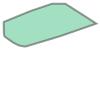

In [92]:
convex_hull = edges.unary_union.convex_hull
# Show output
convex_hull

In [93]:
centroid = convex_hull.centroid

In [95]:
print(centroid)

POINT (24.93068058891328 60.16617710497534)


In [96]:
nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
25216594,60.164794,24.921057,4,NaN,POINT (24.92106 60.16479)
25238874,60.163665,24.921028,4,NaN,POINT (24.92103 60.16366)
25238944,60.164631,24.921286,3,NaN,POINT (24.92129 60.16463)
25291537,60.164325,24.937023,4,NaN,POINT (24.93702 60.16433)
25291564,60.165948,24.941674,4,NaN,POINT (24.94167 60.16595)


In [225]:
maxx = nodes['x'].max()
minn = nodes['x'].min()
target_max = nodes.loc[nodes['x']==maxx, 'geometry'].values[0]
target_min = nodes.loc[nodes['x']==minn, 'geometry'].values[0]
print("TARGET MAX: ", target_max)
print("TARGET MIN: ", target_min)

TARGET MAX:  POINT (24.9430116 60.1664097)
TARGET MIN:  POINT (24.9209507 60.1644322)


In [229]:
# Get origin x and y coordinates
orig_xy = (centroid.y, centroid.x)

# Get target x and y coordinates
target_max_xy = (target_max.y, target_max.x)
target_min_xy = (target_min.y, target_min.x)

In [230]:
# Find the node in the graph that is closest to the origin point (here, we want to get the node id)
orig_node = ox.get_nearest_node(graph, orig_xy, method='euclidean')
orig_node

301360197

In [231]:
# Find the node in the graph that is closest to the target point (here, we want to get the node id)
target_node_max = ox.get_nearest_node(graph, target_max_xy, method='euclidean')
target_node_min = ox.get_nearest_node(graph, target_min_xy, method='euclidean')

1372425714

In [232]:
o_closest = nodes.loc[orig_node]
t_closest_max = nodes.loc[target_node_max]
t_closest_min = nodes.loc[target_node_min]

In [233]:
o_closest

y                                   60.166212
x                                   24.930617
street_count                                3
highway                                   NaN
geometry        POINT (24.9306172 60.1662116)
Name: 301360197, dtype: object

In [235]:
t_closest_max

y                                    60.16641
x                                   24.943012
street_count                                2
highway                       traffic_signals
geometry        POINT (24.9430116 60.1664097)
Name: 317703609, dtype: object

In [236]:
t_closest_min

y                                   60.164432
x                                   24.920951
street_count                                4
highway                                   NaN
geometry        POINT (24.9209507 60.1644322)
Name: 1372425714, dtype: object

In [237]:
# Create a GeoDataFrame from the origin and target points
od_nodes_max = gpd.GeoDataFrame([o_closest, t_closest_max], geometry='geometry', crs=nodes.crs)
od_nodes_max.head()

od_nodes_min = gpd.GeoDataFrame([o_closest, t_closest_min], geometry='geometry', crs=nodes.crs)
od_nodes_min.head()

,y,x,street_count,highway,geometry
301360197,60.166212,24.930617,3,NaN,POINT (24.93062 60.16621)
1372425714,60.164432,24.920951,4,NaN,POINT (24.92095 60.16443)


In [238]:
route_max = nx.shortest_path(graph, orig_node, target_node_max, weight='travel_time')
route_min = nx.shortest_path(graph, orig_node, target_node_min, weight='travel_time')

In [239]:
route_min

[301360197,
 1372441183,
 1372376956,
 56116937,
 1372376935,
 103062861,
 529507770,
 568147264,
 313937382,
 1372425718,
 25238944,
 25216594,
 1372425714]

In [175]:
df_route = gpd.GeoDataFrame([nodes.loc[route_node] for route_node in route])
df

In [176]:
df_route

,y,x,street_count,highway,geometry
301360197,60.166212,24.930617,3,NaN,POINT (24.93062 60.16621)
1372441183,60.165777,24.931227,4,NaN,POINT (24.93123 60.16578)
1372441170,60.165235,24.931999,4,NaN,POINT (24.93200 60.16523)
60170471,60.166117,24.934515,4,NaN,POINT (24.93451 60.16612)
1377211668,60.166917,24.936843,4,NaN,POINT (24.93684 60.16692)
60170470,60.167730,24.939208,3,NaN,POINT (24.93921 60.16773)
1377211669,60.166968,24.940248,4,traffic_signals,POINT (24.94025 60.16697)
25291564,60.165948,24.941674,4,NaN,POINT (24.94167 60.16595)
317703609,60.166410,24.943012,2,traffic_signals,POINT (24.94301 60.16641)


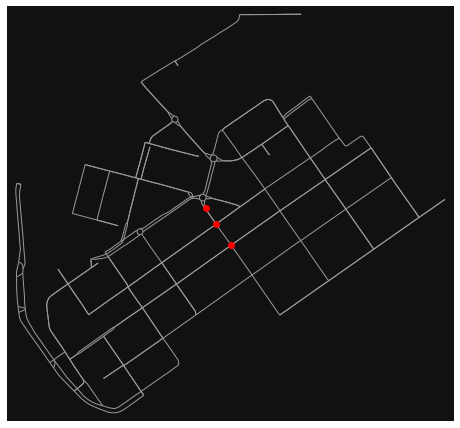

In [282]:
routes = [route_max]
rc = ['r']
#fig, ax = ox.plot_graph_route(graph, route, route_color='r', route_linewidth=6, node_size=0, show=False, close=False)
fig, ax = ox.plot_graph(graph, show=False, close=False, node_size=0, edge_linewidth=1)
ax.scatter(24.93068058891328, 60.16617710497534, c='red')
ax.scatter(24.931227, 60.165777, c='red')
ax.scatter(24.931999, 60.165235, c='red')